In [ ]:
#Importing the required libraries
import numpy as np
import random

In [ ]:
#Importing data
from tensorflow.keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
#Data Statistics
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (50000, 32, 32, 3)
Shape of y_train (50000, 1)
Shape of x_test (10000, 32, 32, 3)
Shape of y_test (10000, 1)


In [ ]:
#Image super classes
super_classes = {0:"aquatic_mammals",
                 1:"fish",
                 2:"flowers",
                 3:"food_containers",
                 4:"fruit_and_vegetables",
                 5:"household_electrical_devices",
                 6:"household_furniture",
                 7: "insects",
                 8: "large_carnivores",
                 9: "large_man-made_outdoor_things",
                 10: "large_natural_outdoor_scenes",
                 11: "large_omnivores_and_herbivores",
                 12: "medium_mammals",
                 13: "non-insect_invertebrates",
                 14: "people",
                 15: "reptiles",
                 16: "small_mammals",
                 17: "trees",
                 18: "vehicles_1",
                 19: "vehicles_2"}

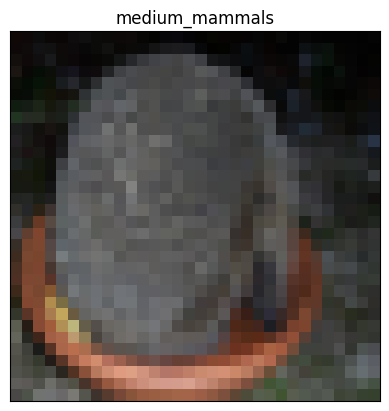

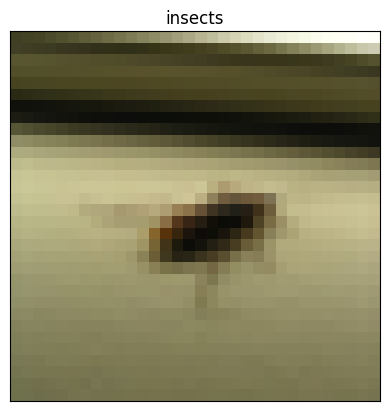

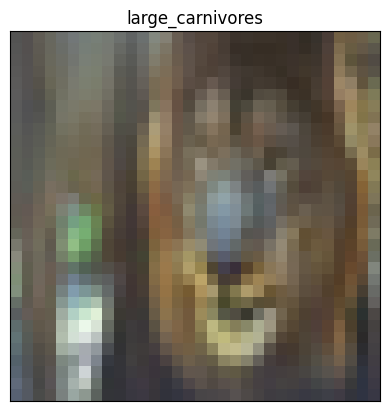

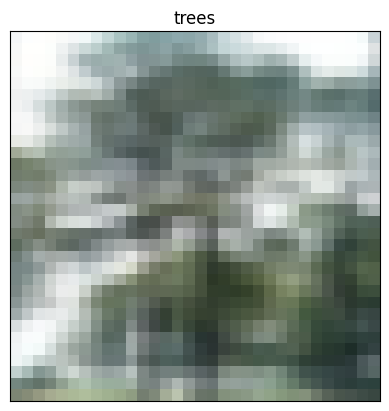

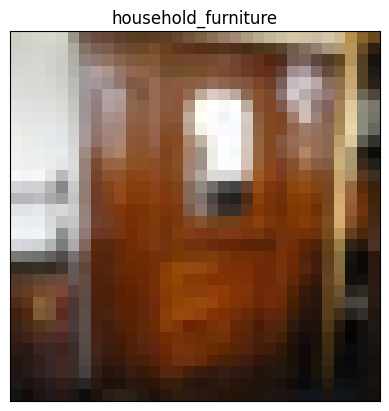

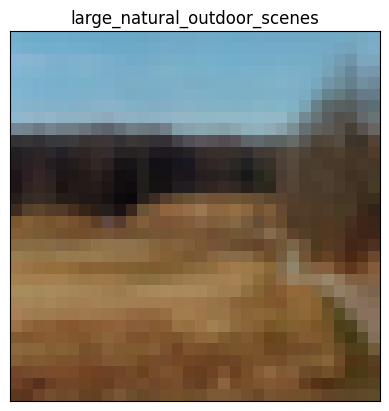

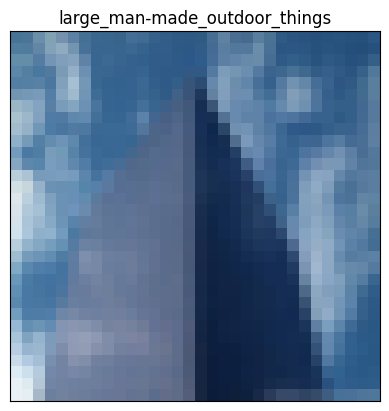

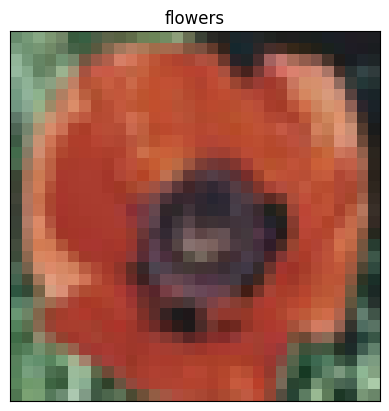

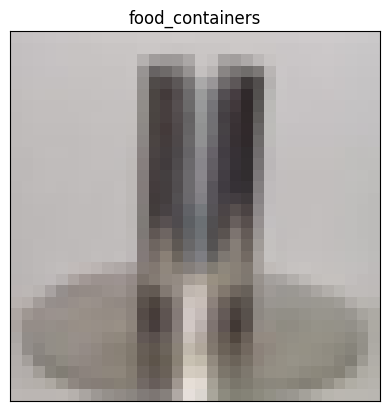

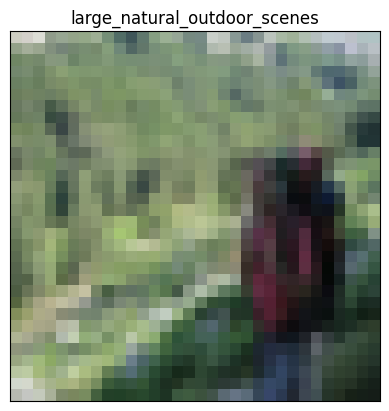

In [ ]:
#Sample images
import matplotlib.pyplot as plt

for i in range(10):
  random_number = random.randrange(0, 50000)
  img = (x_train[random_number])
  imgplot = plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title(super_classes[y_train[random_number][0]])
  plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses

#Preprocessing y
#One hot encoding
y_train_encoded = tf.one_hot(y_train, 20, dtype=tf.int16)
y_train_encoded = tf.squeeze(y_train_encoded)
y_test_encoded = tf.one_hot(y_test, 20, dtype=tf.int16)
y_test_encoded = tf.squeeze(y_test_encoded)

In [ ]:
#Modeling
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_encoded, epochs = 20, batch_size=64,
                 verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 81s 99ms/step - loss: 2.3877 - accuracy: 0.2645
Epoch 2/20
782/782 [==============================] - 78s 99ms/step - loss: 2.0429 - accuracy: 0.3689
Epoch 3/20
782/782 [==============================] - 77s 98ms/step - loss: 1.9744 - accuracy: 0.3862
Epoch 4/20
782/782 [==============================] - 76s 97ms/step - loss: 1.8694 - accuracy: 0.4210
Epoch 5/20
782/782 [==============================] - 76s 97ms/step - loss: 1.7441 - accuracy: 0.4574
Epoch 6/20
782/782 [==============================] - 79s 102ms/step - loss: 1.6561 - accuracy: 0.4853
Epoch 7/20
782/782 [==============================] - 76s 97ms/step - loss: 1.5885 - accuracy: 0.5015
Epoch 8/20
782/782 [==============================] - 76s 97ms/step - loss: 1.5378 - accuracy: 0.5178
Epoch 9/20
509/782 [==================>...........] - ETA: 26s - loss: 1.4733 - accuracy: 0.5398

In [ ]:
#Model Testing
test_loss, test_acc = model.evaluate(x_test,  y_test_encoded, verbose=1)
print(test_acc)

In [ ]:
#Hyperparameter tuning
def buildModel(hyperParameters):
  model = models.Sequential()
  model.add(layers.Conv2D(
      filters=hyperParameters.Int('conv1_filters', min_value=32, max_value=128, step=32),
      kernel_size=hyperParameters.Choice('conv1_kernel', values=[3, 5]),
      activation='relu',
      input_shape=(32, 32, 3)
  ))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(
      filters=hyperParameters.Int('conv2_filters', min_value=64, max_value=256, step=64),
      kernel_size=hyperParameters.Choice('conv2_kernel', values=[3, 5]),
      activation='relu'
  ))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(
      filters=hyperParameters.Int('conv3_filters', min_value=64, max_value=256, step=64),
      kernel_size=hyperParameters.Choice('conv3_kernel', values=[3, 5]),
      activation='relu'
  ))
  model.add(layers.Flatten())
  model.add(layers.Dense(
      units=hyperParameters.Int('dense_units', min_value=32, max_value=128, step=32),
      activation='relu'
  ))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(20, activation='softmax'))
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
!pip install keras-tuner

In [ ]:
import kerastuner as kt

tuner = kt.Hyperband(
    buildModel,
    objective='accuracy',
    max_epochs=10,
    factor=3,
    directory='tuning_logs',
    project_name='tuning_logs'
)


In [ ]:
import keras

class Callback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] > 0.95:
            self.model.stop_training = True

In [ ]:
tuner.search(
    x=x_train,
    y=y_train_encoded,
    epochs=10,
    callbacks=[Callback()]
)

In [ ]:
bestHyperParameters=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
finalModel = tuner.hypermodel.build(bestHyperParameters)
finalModel.fit(x_train, y_train_encoded, epochs=10, validation_split=0.1)

In [ ]:
#Modeling using optimal parameters
model = models.Sequential()
model.add(layers.Conv2D(
    filters=64,
    kernel_size= 3,
    activation='relu',
    input_shape=(32, 32, 3)
))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(
    filters=256,
    kernel_size=3,
    activation='relu'
))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(
    filters=256,
    kernel_size=3,
    activation='relu'
))
model.add(layers.Flatten())
model.add(layers.Dense(
    units=128,
    activation='relu'
))
model.add(layers.BatchNormalization())
model.add(layers.Dense(20, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         590080    
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
model.fit(x_train, y_train_encoded, epochs=20, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 371s 263ms/step - loss: 2.6731 - accuracy: 0.1782 - val_loss: 2.7233 - val_accuracy: 0.1592
Epoch 2/20
1407/1407 [==============================] - 359s 255ms/step - loss: 2.4815 - accuracy: 0.2352 - val_loss: 2.4324 - val_accuracy: 0.2562
Epoch 3/20
1407/1407 [==============================] - 359s 255ms/step - loss: 2.1844 - accuracy: 0.3228 - val_loss: 2.3578 - val_accuracy: 0.2912
Epoch 4/20
1407/1407 [==============================] - 359s 255ms/step - loss: 1.9866 - accuracy: 0.3850 - val_loss: 2.0085 - val_accuracy: 0.3740
Epoch 5/20
1407/1407 [==============================] - 357s 254ms/step - loss: 1.9018 - accuracy: 0.4093 - val_loss: 2.7148 - val_accuracy: 0.1792
Epoch 6/20
1407/1407 [==============================] - 363s 258ms/step - loss: 1.8564 - accuracy: 0.4225 - val_loss: 1.9299 - val_accuracy: 0.4056
Epoch 7/20
1407/1407 [==============================] - 359s 255ms/step - loss: 1.6802 - accuracy: 0.4751 - val_

In [ ]:
#Testing and evaluation of the tuned model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis = 1)

accuracy = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)
classificationReport = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusionMatrix)
print("\nClassification Report:\n", classificationReport)

313/313 [==============================] - 21s 67ms/step
Accuracy: 0.5072

Confusion Matrix:
 [[199  29   1   5   3  10   1  17  33   8  10  40  19  30  10  38  22   5
    7  13]
 [ 44 198  14   6  19   8   8  13  19  15  20  13  10  22  14  32  22   5
   10   8]
 [  1   4 357   6  49   2   2  13   4   3   2   3   5   8  15   6   1   6
    4   9]
 [  4  13   4 251  21  42  26   8  11  16   2   6   5  18  32   7   8   5
    9  12]
 [  2   6  53  10 304   4   6  16  14   5   0   9   3  22  12   9   7   9
    3   6]
 [ 11   7  14  43   8 201  46  16  18  18   5   8   8  22  15  16   7   8
   13  16]
 [  2  10   5  31   3  32 264   4   6  25   5   6   4  15  28   5  12   6
   19  18]
 [  8  12  37   5   9   7   5 230  20   5   1  11   9  61   6  26  14  12
    7  15]
 [ 17   6   3   6   6   3   7   6 287   7   2  36  22  16  16  21  24   6
    6   3]
 [  4   4   1   3   4   7   8   3   8 349  24  15   1   4   1   0   1   7
   14  42]
 [ 12  11   3   2   5   5   4   5  16  53 314   5   6   

In [ ]:
#Pretrained model - Modelling, training, testing
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

baseModel = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

for layer in baseModel.layers:
    layer.trainable = False

model = models.Sequential([
    baseModel,
    layers.GlobalAveragePooling2D(),
    layers.Dense(20, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train_encoded, epochs=30, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test,  y_test_encoded, verbose=1)
print(test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 20)                25620     
                                                                 
Total params: 2,283,604
Trainable params: 25,620
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
1407/1407 [==============================] - 62s 42ms/step - loss: 2.9384 - accuracy: 0.0932 - val_loss: 2.9120 - val_accuracy: 0.1036
Epoch 2/30
1407/1407 [===